In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

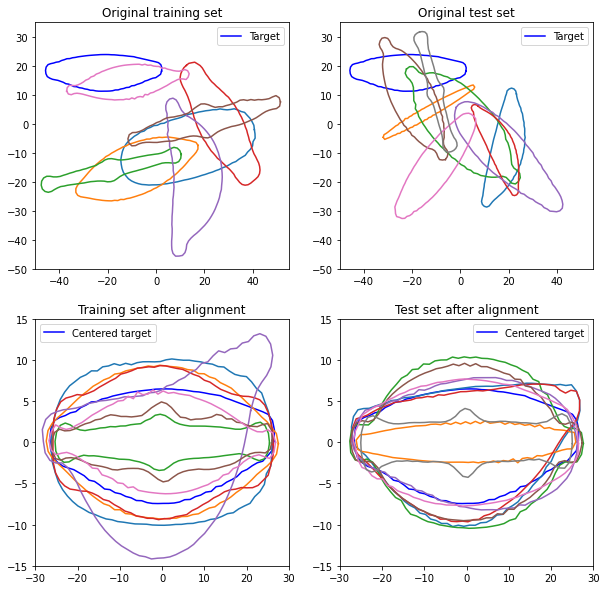

In [2]:
from numpy.linalg import svd

def center(data):
  data_x = data[:, 0::2]
  data_y = data[:, 1::2]
  data_x = data_x - data_x.mean(axis=1).reshape(-1, 1)
  data_y = data_y - data_y.mean(axis=1).reshape(-1, 1)
  return data_x, data_y

def align(X0, data_x, data_y):
  result_x = np.zeros(data_x.shape)
  result_y = np.zeros(data_y.shape)
  for i in range(data_x.shape[0]):
    Y = np.zeros((2, 90))
    Y[0, :] = data_x[i, :]
    Y[1, :] = data_y[i, :]

    (u, s, vh) = svd(np.matmul(Y, X0.T), full_matrices=True)
    v = vh.T
    R = v @ u.T
    rp = R @ Y
    s = (X0[0, :] @ rp[0, :] + X0[1, :] @ rp[1, :]) / (rp[0, :] @ rp[0, :] + rp[1, 0] + rp[1, 0])
    scaled = s * rp
    result_x[i, :] = scaled[0, :]
    result_y[i, :] = scaled[1, :]
  return result_x, result_y

def plots(data_x, data_y, n, name, x):
  plt.subplot(2,2,x) 
  for i in range(n):
    x=np.append(data_x[i,:],data_x[i,0])
    y=np.append(data_y[i,:],data_y[i,0])
    plt.plot(x, y, label='0before')
  plt.title(name)
  plt.axis('on')
  # plt.show()

def test2_1():
  XTrain = np.loadtxt("SIPdiatomsTrain.txt", delimiter= ',')
  XTrainL = np.loadtxt("SIPdiatomsTrain_classes.txt", delimiter= ',')
  XTest = np.loadtxt("SIPdiatomsTest.txt", delimiter= ',')
  XTestL = np.loadtxt("SIPdiatomsTest_classes.txt", delimiter= ',')
  # print(XTrain.shape)
  train_x, train_y  = center(XTrain)
  test_x, test_y = center(XTest)



  X0 = np.zeros((2, 90))
  X0[0,:] = train_x[0, :]
  X0[1,:] = train_y[0, :]

  train_x, train_y = align(X0, train_x, train_y)
  test_x, test_y = align(X0, test_x, test_y)


  train_x_orignal = np.zeros((500, 90))
  train_y_orignal = np.zeros((500, 90))
  train_x_orignal = XTrain[:,0::2]
  train_y_orignal = XTrain[:,1::2]
  test_x_orignal = np.zeros((500, 90))
  test_y_orignal = np.zeros((500, 90))
  test_x_orignal = XTest[:,0::2]
  test_y_orignal = XTest[:,1::2]


  target = np.zeros((2, 91))
  target[0,:]=np.append(train_x_orignal[0,:],train_x_orignal[0,0])
  target[1,:]=np.append(train_y_orignal[0,:],train_y_orignal[0,0])

  target1 = np.zeros((2, 91))
  target1[0,:]=np.append(train_x[0,:],train_x[0,0])
  target1[1,:]=np.append(train_y[0,:],train_y[0,0])

  n = 8

  plt.figure(figsize = (10, 10))

  plt.subplot(2,2,1) 
  plt.plot(target[0, :], target[1, :],'-b', label='Target')
  for i in range(1,n):
    x=np.append(train_x_orignal[i,:],train_x_orignal[i,0])
    y=np.append(train_y_orignal[i,:],train_y_orignal[i,0])
    plt.plot(x, y)
  plt.title('Original training set')
  plt.legend()
  plt.xlim((-50, 55))
  plt.ylim((-50, 35))
  plt.axis('on')


  plt.subplot(2,2,2) 
  plt.plot(target[0, :], target[1, :],'-b', label='Target')
  for i in range(n):
    x=np.append(test_x_orignal[i,:],test_x_orignal[i,0])
    y=np.append(test_y_orignal[i,:],test_y_orignal[i,0])
    plt.plot(x, y)
  plt.title('Original test set')
  plt.legend()
  plt.xlim((-50, 55))
  plt.ylim((-50, 35))
  plt.axis('on')


  plt.subplot(2,2,3) 
  plt.plot(target1[0, :], target1[1, :],'-b', label='Centered target')
  for i in range(1,n):
    x=np.append(train_x[i,:],train_x[i,0])
    y=np.append(train_y[i,:],train_y[i,0])
    plt.plot(x, y)
  plt.title('Training set after alignment')
  plt.legend()
  plt.xlim((-30, 30))
  plt.ylim((-15, 15))
  plt.axis('on')


  plt.subplot(2,2,4) 
  plt.plot(target1[0, :], target1[1, :],'-b', label='Centered target')
  for i in range(n):
    x=np.append(test_x[i,:],test_x[i,0])
    y=np.append(test_y[i,:],test_y[i,0])
    plt.plot(x, y)
  plt.title('Test set after alignment')
  plt.legend()
  plt.xlim((-30, 30))
  plt.ylim((-15, 15))
  plt.axis('on')
  plt.savefig('2.1.png',bbox_inches='tight')
  plt.show()

test2_1()


In [3]:
from sklearn.neighbors import KNeighborsClassifier

def test2_2():
    XTrain = np.loadtxt("SIPdiatomsTrain.txt", delimiter= ',')
    XTrainL = np.loadtxt("SIPdiatomsTrain_classes.txt", delimiter= ',')
    XTest = np.loadtxt("SIPdiatomsTest.txt", delimiter= ',')
    XTestL = np.loadtxt("SIPdiatomsTest_classes.txt", delimiter= ',')
    
    train_x, train_y  = center(XTrain)
    test_x, test_y = center(XTest)
    X0 = np.zeros((2, 90))
    X0[0,:] = train_x[0, :]
    X0[1,:] = train_y[0, :]
    train_x, train_y = align(X0, train_x, train_y)
    test_x, test_y = align(X0, test_x, test_y)

    knn = KNeighborsClassifier()
    knn.fit(XTrain, XTrainL)
    Pred_labels = knn.predict(XTest)
    acc = sum(Pred_labels==XTestL) / len(XTestL)
    print(acc)

    xTrain_pro = np.append(train_x, train_y, axis=1)
    xTest_pro = np.append(test_x, test_y, axis=1)

    knn2 = KNeighborsClassifier()
    knn2.fit(xTrain_pro, XTrainL)
    Pred_labels_aligned = knn2.predict(xTest_pro)
    acc_aligned = sum(Pred_labels_aligned==XTestL) / len(XTestL)
    print(acc_aligned)

test2_2()

0.03214285714285714
0.6428571428571429


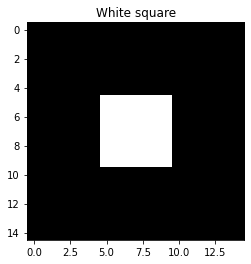

In [4]:
def square_image(x,y):
    res = np.ones([x,y])
    res = np.pad(res, ((x,x),(y,y)), constant_values=(0,0))
    return res

def test3_4():
    image = square_image(5,5)
    plt.imshow(image, cmap="gray")
    plt.title('White square')
    plt.savefig('3.4.png',bbox_inches='tight')

    
test3_4()


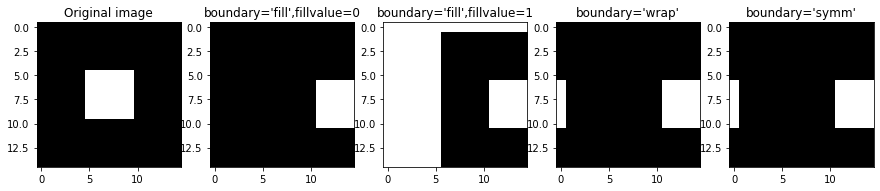

In [5]:
from scipy.signal import convolve2d

# def shift(image, x, y):
#     trans = -np.asarray([x,y])
#     transform = AffineTransform(translation=trans)
#     shifted = warp(image, transform, mode='wrap', preserve_range=True)
#     # shifted = shifted.astype(image.dtype)
#     return shifted

def shift_filter(image, x, y, boundary, fillvalue=0):
    kernel = np.zeros([2*abs(x)+1, 2*abs(y)+1])
    x = -1 if x > 0 else 0
    y = -1 if y > 0 else 0
    kernel[x, y] = 1
    kernel = kernel.T
    # print(kernel)
    result = convolve2d(image, kernel, mode='same',boundary=boundary,fillvalue=fillvalue)
    return result

def test3_5():
    image = square_image(5,5)
    x,y = 6,1
    newImage1 = shift_filter(image, x, y, 'fill')
    newImage4 = shift_filter(image, x, y, 'fill', fillvalue=1)
    newImage2 = shift_filter(image, x, y, 'wrap')
    newImage3 = shift_filter(image, x, y, 'symm')

    plt.figure(figsize = (15, 5))

    plt.subplot(1,5,1) 
    plt.imshow(image, cmap="gray")
    plt.axis('on')
    plt.title("Original image")

    plt.subplot(1,5,2) 
    plt.imshow(newImage1, cmap="gray")
    plt.axis('on')
    plt.title("boundary='fill',fillvalue=0")

    plt.subplot(1,5,3) 
    plt.imshow(newImage4, cmap="gray")
    plt.axis('on')
    plt.title("boundary='fill',fillvalue=1")

    plt.subplot(1,5,4) 
    plt.imshow(newImage2, cmap="gray")
    plt.axis('on')
    plt.title("boundary='wrap'")

    plt.subplot(1,5,5) 
    plt.imshow(newImage3, cmap="gray")
    plt.axis('on')
    plt.title("boundary='symm'")
    plt.savefig('3.5.png',bbox_inches='tight')
    plt.show()

test3_5()


[[ 1. -0.  1.]
 [ 0.  1.  1.]
 [ 0.  0.  1.]]


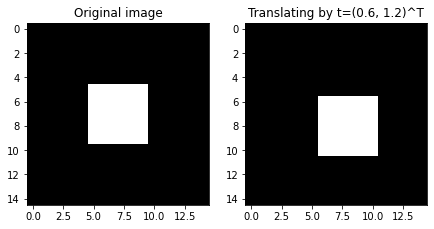

In [6]:
from skimage.transform import warp,AffineTransform
image = square_image(5,5)
tform = AffineTransform(
    translation=(1,1),
        # shear=np.pi/6,
        )
print(tform.params)
warped = warp(image, tform.inverse)
matrix = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1]])
# warped = warp(image, matrix.inverse)

plt.figure(figsize = (15, 5))

plt.subplot(1,4,1) 
plt.imshow(image, cmap="gray")
plt.axis('on')
plt.title("Original image")

plt.subplot(1,4,2) 
plt.imshow(warped, cmap="gray")
plt.axis('on')
plt.title("Translating by t=(0.6, 1.2)^T")
# plt.savefig('3.6.png',bbox_inches='tight')
plt.show()
# from skimage.transform import ProjectiveTransform
# warped = warp(image, ProjectiveTransform(matrix=matrix))

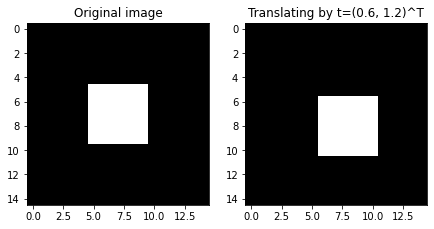

In [8]:


def shift_homogeneous(image, tx, ty):
    image_x, image_y = image.shape
    matrix = np.matrix([[1,0,tx],
                        [0,1,ty],
                        [0,0,1]])
    matrix = matrix.I
    result = np.zeros([image_x, image_y])
    for i in range(image_x):
        for j in range(image_y):
            vector = np.asarray([[i],[j],[1]])
            oldXY = matrix @ vector
            x=round(oldXY[0,0])
            y=round(oldXY[1,0]) 
            # result[x,y]=image[i,j]
            result[i,j]=image[x,y]
    return result

def test3_6():
    image1 = square_image(5,5)
    # image = imread('trui.png')
    x,y = 0.6,1.2
    newImage1 = shift_homogeneous(image, x, y)
    # newImage2 = shift_filter(image, x, y, 'wrap')
    # newImage3 = shift_filter(image, x, y, 'symm')

    plt.figure(figsize = (15, 5))

    plt.subplot(1,4,1) 
    plt.imshow(image, cmap="gray")
    plt.axis('on')
    plt.title("Original image")

    plt.subplot(1,4,2) 
    plt.imshow(newImage1, cmap="gray")
    plt.axis('on')
    plt.title("Translating by t=(0.6, 1.2)^T")
    plt.savefig('3.6.png',bbox_inches='tight')
    plt.show()

test3_6()

# def shift_interpolation(image, x, y):
#     image_x, image_y = image.shape
#     result = np.zeros([image_x, image_y])
#     for i in range(image_x):
#         for j in range(image_y):
#             result[i,j]=image[round(i+x) % image_x, round(j+y) % image_y]
#     return result

    # for i in range(image_x):
    #     for j in range(image_y):
    #         x=round(i-x) % image_x
    #         y=round(j-y) % image_y
    #         result[i,j]=image[x,y]
    # return result

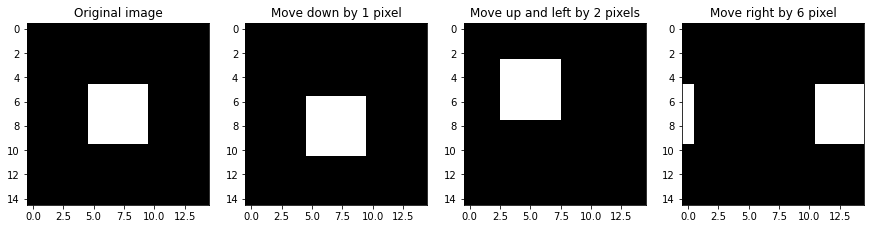

In [9]:
from scipy import fft

def shift_fft(img, tx, ty):
  size = img.shape
  img_fft = fft.fft2(img)
  x, y = np.arange(size[1]), np.arange(size[0])
  xx, yy = np.meshgrid(x, y)
  kernel = np.exp(-2*np.pi*1.j*(xx *tx/size[1] + yy *ty/size[0])) 
  img_fft_derive = img_fft*kernel
  img_derive = fft.ifft2(img_fft_derive)
  return abs(img_derive)

def test3_7():
    image = square_image(5,5)

    newImage1 = shift_fft(image, 6, 0)
    newImage2 = shift_fft(image, 0, 1)
    newImage3 = shift_fft(image, -2, -2)
    # print(newImage1)

    plt.figure(figsize = (15, 5))

    plt.subplot(1,4,1) 
    plt.imshow(image, cmap="gray")
    plt.axis('on')
    plt.title("Original image")

    plt.subplot(1,4,4) 
    plt.imshow(newImage1, cmap="gray")
    plt.axis('on')
    plt.title("Move right by 6 pixel")

    plt.subplot(1,4,2) 
    plt.imshow(newImage2, cmap="gray")
    plt.axis('on')
    plt.title("Move down by 1 pixel")

    plt.subplot(1,4,3) 
    plt.imshow(newImage3, cmap="gray")
    plt.axis('on')
    plt.title("Move up and left by 2 pixels")
    plt.savefig('3.7.png',bbox_inches='tight')
    plt.show()

test3_7()

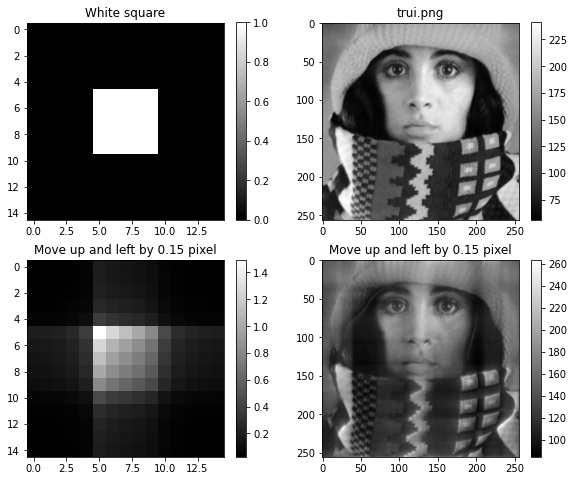

In [10]:

def test3_8():
    image = square_image(5,5)
    image1 = imread('trui.png')
    
    n=0.15
    newImage1 = shift_fft(image, n, n)
    newImage2 = shift_fft(image1, n, n)

    plt.figure(figsize = (9.7, 8))

    plt.subplot(2,2,1) 
    plt.imshow(image, cmap="gray")
    plt.axis('on')
    plt.colorbar()
    plt.title("White square")

    plt.subplot(2,2,3) 
    plt.imshow(newImage1, cmap="gray")
    plt.axis('on')
    plt.colorbar()
    plt.title("Move up and left by 0.15 pixel")

    plt.subplot(2,2,2) 
    plt.imshow(image1, cmap="gray")
    plt.axis('on')
    plt.colorbar()
    plt.title("trui.png")

    plt.subplot(2,2,4) 
    plt.imshow(newImage2, cmap="gray")
    plt.axis('on')
    plt.title("Move up and left by 0.15 pixel")
    plt.colorbar()

    plt.savefig('3.8.png',bbox_inches='tight')
    plt.show()

test3_8()

In [11]:
# from numpy.linalg import svd
# from sklearn.neighbors import KNeighborsClassifier
# XTrain = np.loadtxt("SIPdiatomsTrain.txt", delimiter= ',')
# XTrainL = np.loadtxt("SIPdiatomsTrain_classes.txt", delimiter= ',')
# XTest = np.loadtxt("SIPdiatomsTest.txt", delimiter= ',')
# XTestL = np.loadtxt("SIPdiatomsTest_classes.txt", delimiter= ',')

# def center(X):
#   Xs = X[:, 0::2]
#   Ys = X[:, 1::2]
#   # print(Xs.shape)
#   # print(Ys.shape)
#   Xn, Yn  =  (Xs - Xs.mean(axis=1).reshape(-1, 1),Ys - Ys.mean(axis=1).reshape(-1, 1))
#   result = np.zeros(X.shape)
#   result[:, 0::2] = Xn
#   result[:, 1::2] = Yn
#   return result

# def ralign(X, Ys):
#   result = np.zeros(Ys.shape)
#   for r in range(Ys.shape[0]):
#     points = Ys[r, :]
#     Y = np.zeros((2, 90))
#     Y[0, :] = points[0::2]
#     Y[1, :] = points[1::2]

#     (u, s, vh) = svd(np.matmul(Y, X.T), full_matrices=True)
#     v = vh.T

#     R = v @ u.T
#     rp = R @ Y
#     s = (X[0, :] @ rp[0, :] + X[1, :] @ rp[1, :]) / (rp[0, :] @ rp[0, :] + rp[1, 0] + rp[1, 0])
#     scaled = s * rp
#     result[r, 0::2] = scaled[0, :]
#     result[r, 1::2] = scaled[1, :]
#     # print(r)
#   return result

# xTrain_cen  = center(XTrain)
# # print(points.shape)

# x0 = np.zeros((2, 90))
# x0[0, :] = xTrain_cen[0, 0::2]
# x0[1, :] = xTrain_cen[0, 1::2]

# xTest_cen = center(XTest)

# xTrain_pro = ralign(x0, xTrain_cen)
# xTest_pro = ralign(x0, xTest_cen)

# xTrain_pro_x = xTrain_pro[:,0::2]
# xTrain_pro_y = xTrain_pro[:,1::2]
# xTest_pro_x = xTest_pro[:,0::2]
# xTest_pro_y = xTest_pro[:,1::2]
# xTrain_x = XTrain[:,0::2]
# xTrain_y = XTrain[:,1::2]
# xTest_x = XTest[:,0::2]
# xTest_y = XTest[:,1::2]
# n = 8

# plt.figure(figsize = (10, 10))

# plt.subplot(2,2,1) 
# for i in range(n):
#   plt.plot(xTrain_x[i,:], xTrain_y[i,:])
# plt.title('Original training set')
# plt.axis('on')


# plt.subplot(2,2,2) 
# for i in range(n):
#   plt.plot(xTest_x[i,:], xTest_y[i,:])
# plt.title('Original test set')
# plt.axis('on')


# plt.subplot(2,2,3) 
# for i in range(1,n):
#   plt.plot(xTrain_pro_x[i,:], xTrain_pro_y[i,:])
# plt.title('Training set after alignment')
# plt.axis('on')


# plt.subplot(2,2,4) 
# for i in range(n):
#   plt.plot(xTest_pro_x[i,:], xTest_pro_y[i,:])
# plt.title('Test set after alignment')
# plt.axis('on')

# plt.show()


# knn = KNeighborsClassifier()
# knn.fit(XTrain, XTrainL)
# Pred_labels = knn.predict(XTest)
# acc = sum(Pred_labels==XTestL) / len(XTestL)
# print(acc)


# knn2 = KNeighborsClassifier()
# knn2.fit(xTrain_pro, XTrainL)
# Pred_labels_aligned = knn2.predict(xTest_pro)
# acc_aligned = sum(Pred_labels_aligned==XTestL) / len(XTestL)
# print(acc_aligned)
